## Distributions of Trigonometric Functions of RVs
Consider a random variable (RV) $\Theta$ following a known probability density distribution (PDF) $ f_{\Theta} $ and cumulative distribution function (CDF) $F_{\Theta}$. We are interested in estimating the probability distribution followed by a trigonometric function of $\Theta$. The probability distribution for cosine and tangent transformations are derived below.
  
### Case 1: Cosine Transformation
Let $ Y = \cos{\Theta} $,
then the task is to estimate probability distribution of $ Y $. The CDF of $ Y $ can be written as:

$$
\begin{align}
    F_Y(y)  &= P\{Y \leq y\}\\
            &= P\{\cos{\Theta} \leq y \}\\
            &= P\{\Theta \geq \cos^{-1}(y) \}\\
            &= P\{\Theta \leq \cos^{-1}(-y) \}\\
            &= F_{\Theta}\left(\cos^{-1}(-y)\right) \tag{1} \\[1em] 
            &= \int_{-\infty}^{\cos^{-1}(-y)} f_{\Theta}(\theta)\ d\theta \tag{2}
\end{align}
$$

The PDF of $Y$ can then be estimated from its definition as:
$$
\begin{align}
f_Y(y)  &= \frac{d}{dy} F_Y(y)\\
        &= f_{\Theta}(\theta=\cos^{-1}(-y)) . \dfrac{1}{\sqrt{1 - y^2}} \tag{3}
\end{align}
$$

The final form given in Eq. (3) is obtained by applying chain rule of differentiation. It allows the estimation of the PDF of the transformed variable $f_Y(y)$ from the PDF of the original RV $ f_{\Theta}(\theta) $.

### Case 2: Tangent Transformation
Let $ Y = \tan{\Theta} $,
then the task is to estimate probability distribution of $ Y $. The CDF of $ Y $ can be written as:

$$
\begin{align}
    F_Y(y)  &= P\{Y \leq y\}\\
            &= P\{\tan{\Theta} \leq y \}\\
            &= P\{\Theta \leq \tan^{-1}(y) \}\\
            &= F_{\Theta}\left(\tan^{-1}(y)\right) \tag{4} \\[1em] 
            &= \int_{-\infty}^{\tan^{-1}(y)} f_{\Theta}(\theta)\ d\theta \tag{5}
\end{align}
$$

The PDF of $ Y $ can then be estimated from its definition as:
$$
\begin{align}
f_Y(y)  &= \frac{d}{dy} F_Y(y)\\
        &= f_{\Theta}(\theta=\tan^{-1}(y)) . \dfrac{1}{1 + y^2} \tag{6}
\end{align}
$$

Estimation of probability distributions of the above transformations is implemented as Python functions 'map_rv2cos' and 'map_rv2tan' below. They are further validated for various distributions of $ \Theta $. As these distributions generated for validation are discrete distributions, appropriate modifications are made to the Eq.s (1)-(6).

In [1]:
## SETUP
%config Completer.use_jedi = False  # To avoid delays in autocompletion during coding.
import os
import sys
os.chdir('..')  # changing to a higher dir to access custom modules
cwd = os.getcwd()
sys.path.append(cwd)

import numpy as np  # numpy for matrix, linear-algebra, and other numerical studies.
from matplotlib_settings import *
from itertools import product
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

In [2]:
# Python functions to esimate PDF of trigonometric transformation of RVs.

def map_rv2cos(x, pmf_x, y):
    """
    Estimates PMF p(y) for the tranformation y=cos(x) when the PMF p(x) is given.
    """
    assert len(x) == len(pmf_x), print("check input: len(x) not equal to len(pmf_x).")
    F = interp1d(x, pmf_x, kind='quadratic', fill_value='extrapolate')
    pmf_y = F(np.arccos(-y)) * (1 / np.sqrt(1 - y**2))
    assert len(pmf_y) == len(y)
    return pmf_y


def map_rv2tan(x, pmf_x, y):
    """
    Estimates PMF p(y) for the tranformation y=tan(x) when the PMF p(x) is given.
    """
    assert len(x) == len(pmf_x), print("check input: len(x) not equal to len(pmf_x).")
    F = interp1d(x, pmf_x, kind='quadratic', fill_value='extrapolate')
    pmf_y = F(np.arctan(y)) * (1 / (1 + y**2))
    assert len(pmf_y) == len(y)
    return pmf_y

## Test Distributions
### 1. Generation of test distributions
The Python implementations of the trigonometric transformations of RVs are tested and validated below. To this end, six test distributions of $ \Theta $ are generated. Except for one case of uniform distribution, the other five cases are generated using the von Mises distribution. These test distributions are sufficiently representative of biased fibre orientations in concrete.

#### Uniform distribution
The PDF of uniform distribution is given by:
$$
f(x) = \dfrac{1}{b-a}, \qquad \text{for } x \in [a, b] \tag{7}
$$

#### von Mises distribution
The PDF of von Mises distribution is given by:
$$
f(x | \mu, \kappa) = \dfrac{e^{\kappa \cos(x - \mu)}}{2 \pi I_0(\kappa)} \tag{8}
$$

where, $ I_0 $ is the modified Bessel function of order 0. 

For generation of these distributions, their versions available in the 'random' module of the Python library 'numpy' are used directly as below.

In [3]:
# Generating distributions to validate the python implementations.
N = 1000  # total number of observations in the discrete distribution 
thetaLow, thetaHigh = (0, np.pi)  # domain of theta, the primary RV
thetaVals = np.deg2rad(np.arange(0, 180))  # in radians
thetaBins = np.deg2rad(np.arange(0, 181, 10)) # bin edges for plotting histogram of the distribution

mu = np.pi/2
kappa = [0.1, 0.25, 0.5, 1., 5.]
thetaDistrs = [np.random.uniform(low=thetaLow, high=thetaHigh, size=N)]  # uniform distribution

for k in kappa:
    thetaDistrs.append(np.random.vonmises(mu, k, N))  # von Mises distributions centred around 90 deg

### 2. PMF of test distributions
The test distributions are generated as a collection of observations. In this section, their probability mass function (PMF) are estimated for further calculations. Though Eq.s (7) and (8) provide analytical expressions for uniform and von Mises distributions, they are not used here. Rather, a smooth PMF curve is fit to the generated distributions.

A suitable PMF curve is fit to a distribution by firstly estimating the tensor representation of the distribution, and then expanding the tensor into a Fourier series. These approaches have been separately verified and implemented. Therefore, these are not discussed in detail here.

In [4]:
# Functions to estimate orientation and anisotropy tensors from a given probability distribution (histogram), 
# and further convert them to PMF.

def orient_tensor_2D(prob_phi, phi_vals):
    """
    Function to estimate orientation and anisotropy tensors from a given probability distribution (histogram).
    """
    if len(phi_vals) == len(prob_phi) + 1:
        phi_vals = 0.5 * (phi_vals[:-1] + phi_vals[1:])
    elif len(phi_vals) == len(prob_phi):
        pass
    else:
        raise ValueError("check dimensions of prob_phi and phi_vals: {0}, {1}".format(len(prob_phi), len(phi_valsDeg)))

    # check for total probability = 1
    d_phi = np.mean(phi_vals[1:] - phi_vals[:-1])  # mean bin width of phi values (delta_phi)
    total_prob = np.sum(prob_phi) * d_phi
    if not np.isclose(total_prob, 1.):
        print("Total probability not 1: {:1.2f}".format(total_prob))

    # setup
    order = 2
    coords = (0, 1)  # possible coordinates in 2D space
    base = tuple([coords] * order)  # tensor space dimension = coords * order
    indices = list(product(*base))  # all possible tensor indices Qijkl

    # direction cosines
    u = np.zeros((2, len(phi_vals)))
    u[0, :] = np.cos(phi_vals)
    u[1, :] = np.sin(phi_vals)

    # Orientation Tensor
    Q = []
    for indx in indices:
        # print("index: ", indx)
        elem = prob_phi
        for i in indx:
            elem = elem * u[i, :]
        Q.append(np.sum(elem))
    Q = np.array(Q).reshape((order, order)) * d_phi
    A = Q - 0.5*np.eye(order)
    
    return Q, A


def tensor2odf_2D(phivals, A):
    """
    Function to estimate PMF from tensor.
    """
    assert A.shape == (2, 2), 'Only two-dimensional tensors accepted'
    c = np.cos(phivals)
    s = np.sin(phivals)
    a = A.ravel()
    afunc = a[0] * (c*c - 0.5) + a[1] * (c*s) + a[2] * (s*c) + a[3] * (s*s - 0.5)
    odf = 1 / (2*np.pi) + (2 / np.pi) * afunc
    return odf

In [5]:
# Defining the PMF of above distributions
thetaBinc = 0.5 * (thetaBins[1:] + thetaBins[:-1])
thetaPMFs = []
for distr in thetaDistrs:
    h, b = np.histogram(distr, bins=thetaBins, density=True)
    Q, A = orient_tensor_2D(h, thetaBins)
    pmf = tensor2odf_2D(thetaBinc, A) * 2
    thetaPMFs.append(pmf)

### 3. Visualisation
The test distributions are visualized as a histograms (density plot) in Fig. 1. The PMFs generated for each distribution are also shown. The PMFs show a good fit to the corresponding distribution (histogram).

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


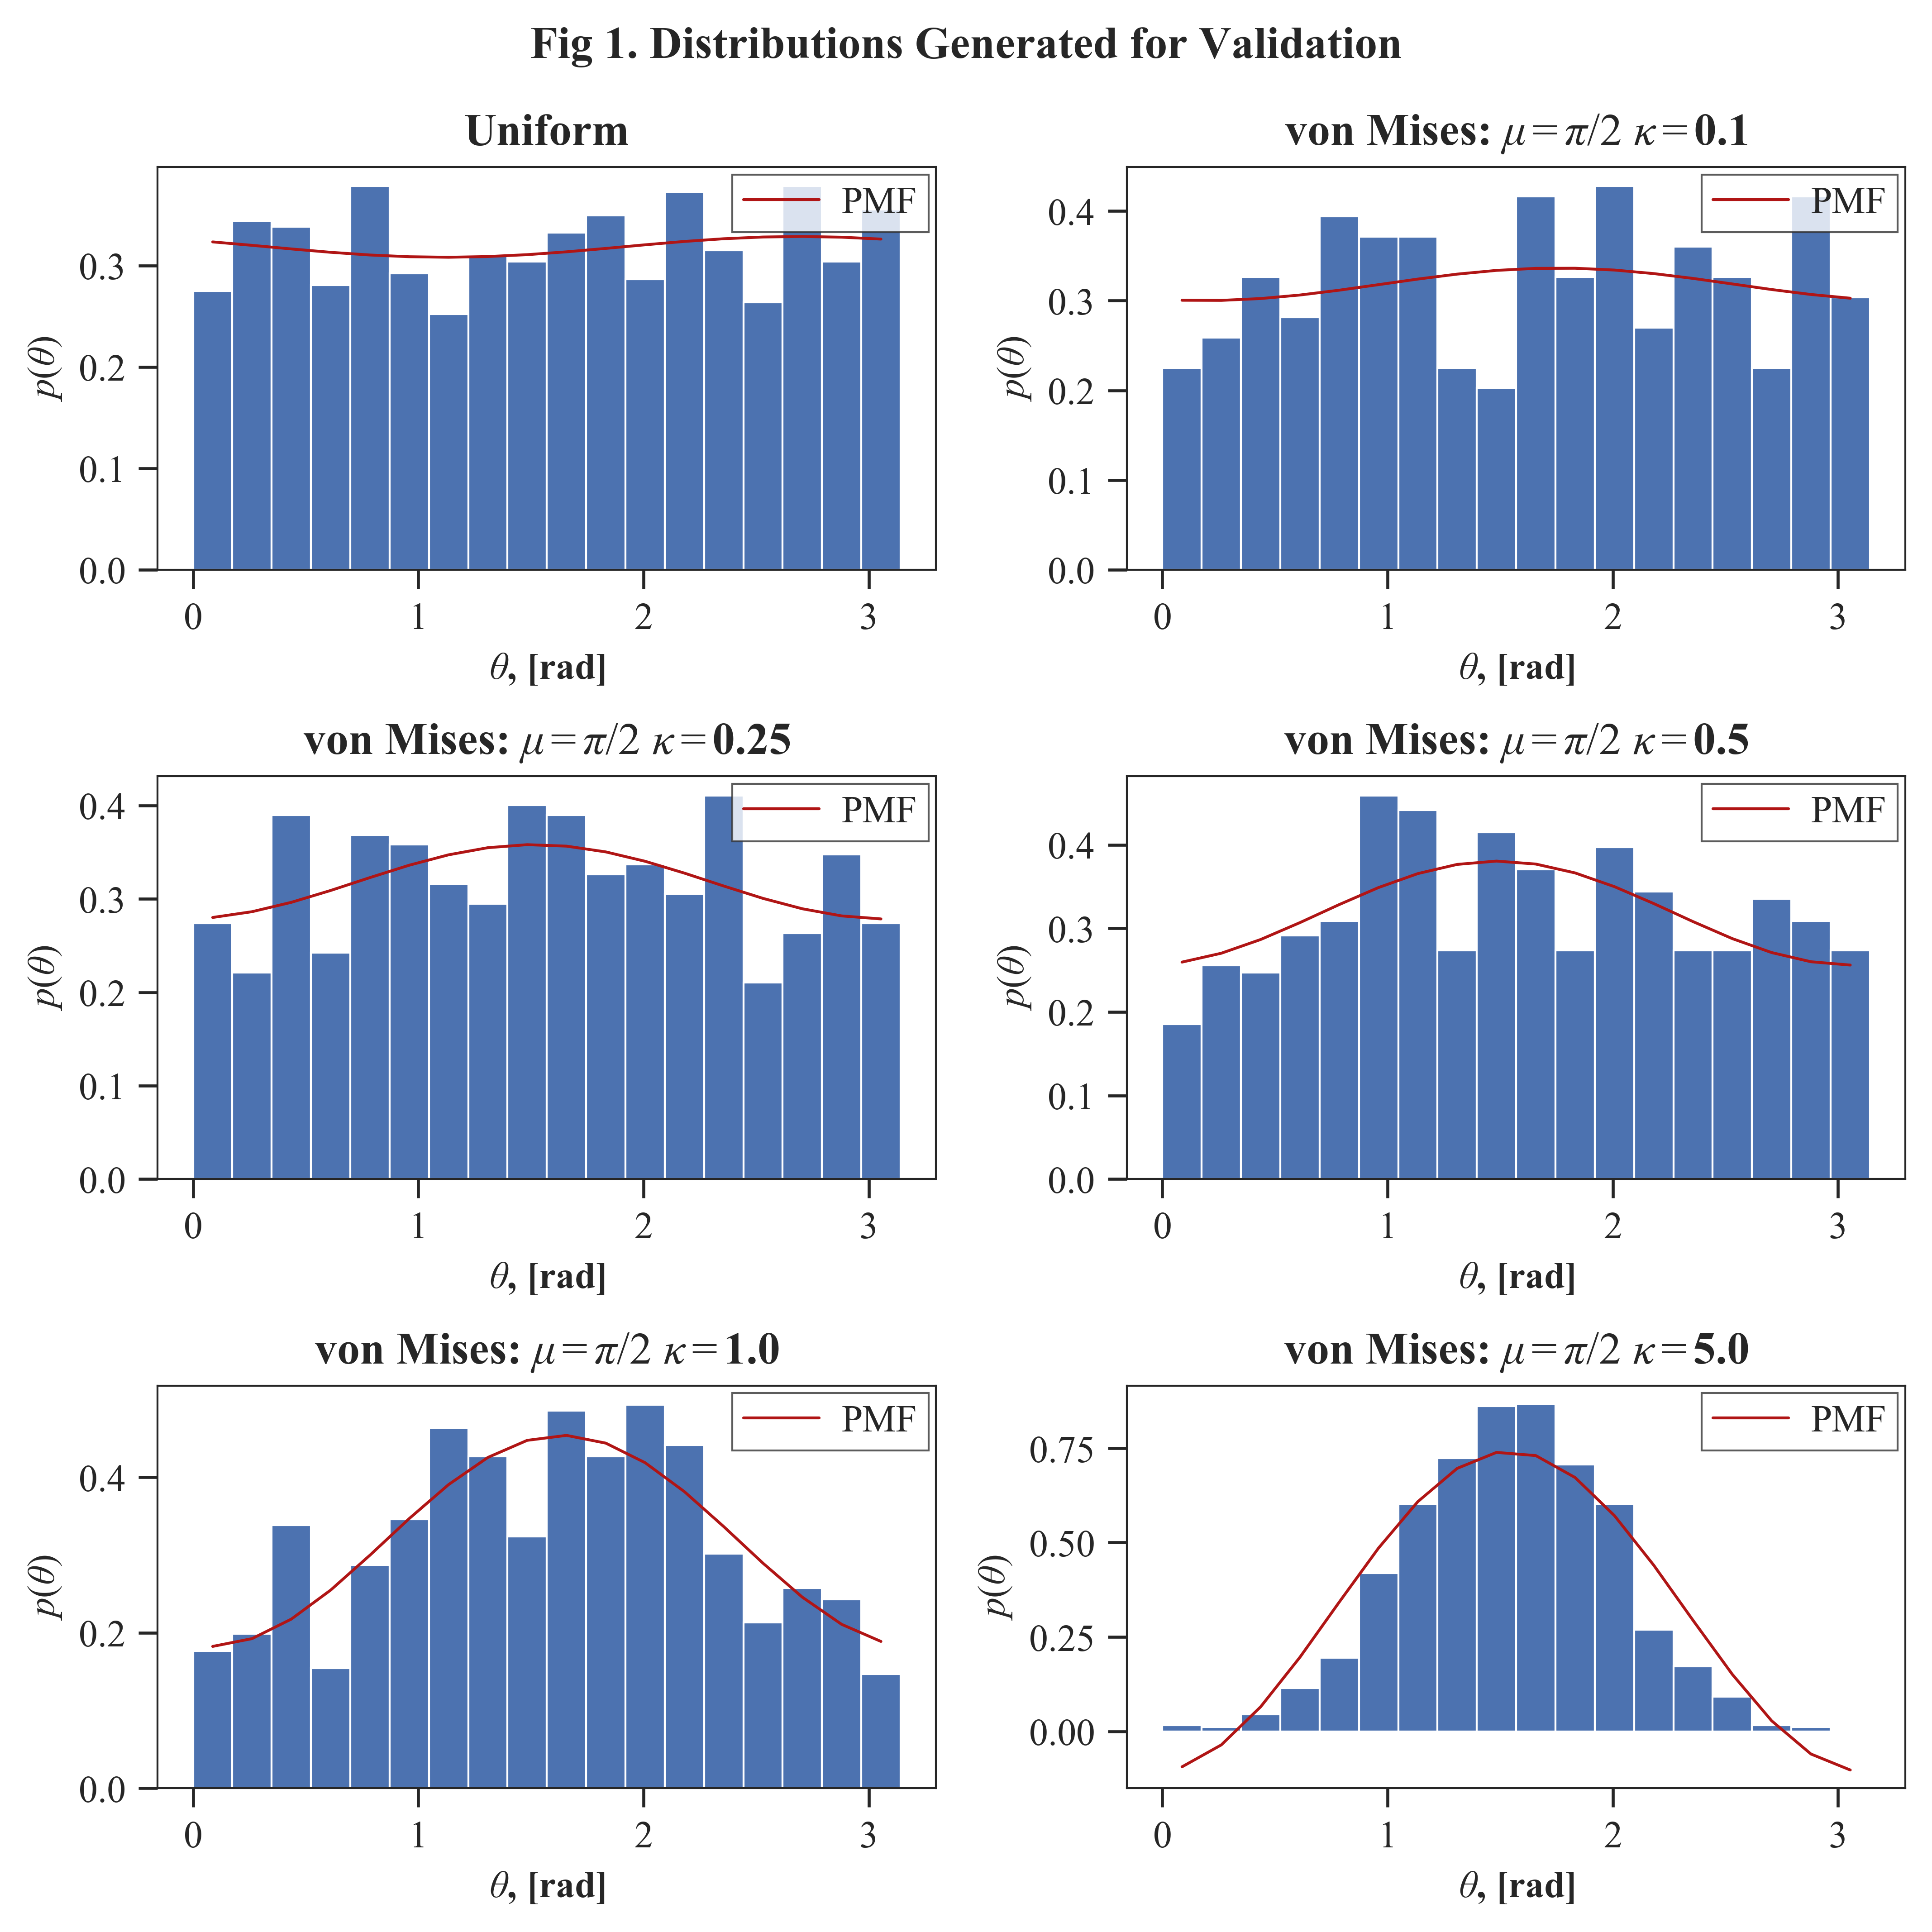

In [6]:
# Figure: Visualise the distributions generated for validation.
fig, axes = plt.subplots(3, 2, figsize=(7, 7))
axs = axes.ravel()

for n, (distr, pmf) in enumerate(zip(thetaDistrs, thetaPMFs)):
    ax = axs[n]
    h, b, _ = ax.hist(distr, bins=thetaBins, density=True)
    ax.plot(thetaBinc, pmf, lw=0.75, color=np.asarray([176, 21, 21]) / 255, label='PMF')
    if n == 0:
        ax.set_title("Uniform")
    else:
        ax.set_title("von Mises: $\mu=\pi/2$ $\kappa=${0}".format(kappa[n-1]))
    ax.set_xlabel("$\\theta$, [rad]")
    ax.set_ylabel("$p(\\theta)$")
    ax.legend(loc='upper right')

fig.suptitle("Fig 1. Distributions Generated for Validation")
plt.show()

### 4. Trigonometric Transformations
The cosine and tangent transformations of the generated distribution observations are performed below. Further, the PMFs of these transformations are independently estimated using the Eq.s (1)-(6). A good agreement between the transformed distributions and the corresponding PMFs will serve as validation to the equations developed, as well as their Python implementations.

In [7]:
# Transforming the test distributions
cosDistrs = [np.cos(distr) for distr in thetaDistrs]
tanDistrs = [np.tan(distr-np.pi/2) for distr in thetaDistrs]

In [8]:
# Estimating PMFs of cosine and tangent transformations based on Eq.s (1)-(6)
cosBinc = np.cos(thetaBinc)[::-1]
cosPMFs = [map_rv2cos(thetaBinc, pmf, cosBinc) for pmf in thetaPMFs]

tanBinc = np.tan(thetaBinc - np.pi/2)
tanPMFs = [map_rv2tan(thetaBinc - np.pi/2, pmf, tanBinc) for pmf in thetaPMFs]

## Validation
The cosine and tangent transformed distributions (observations) are plotted as histograms in Fig.s 2 and 3. The PMF estimated using Python implementations of Eq.s (1)-(6) are also plotted on the same figures; they fit the histograms very well. The total probability of the PMF is also verified; the results for all cases are close to unity.

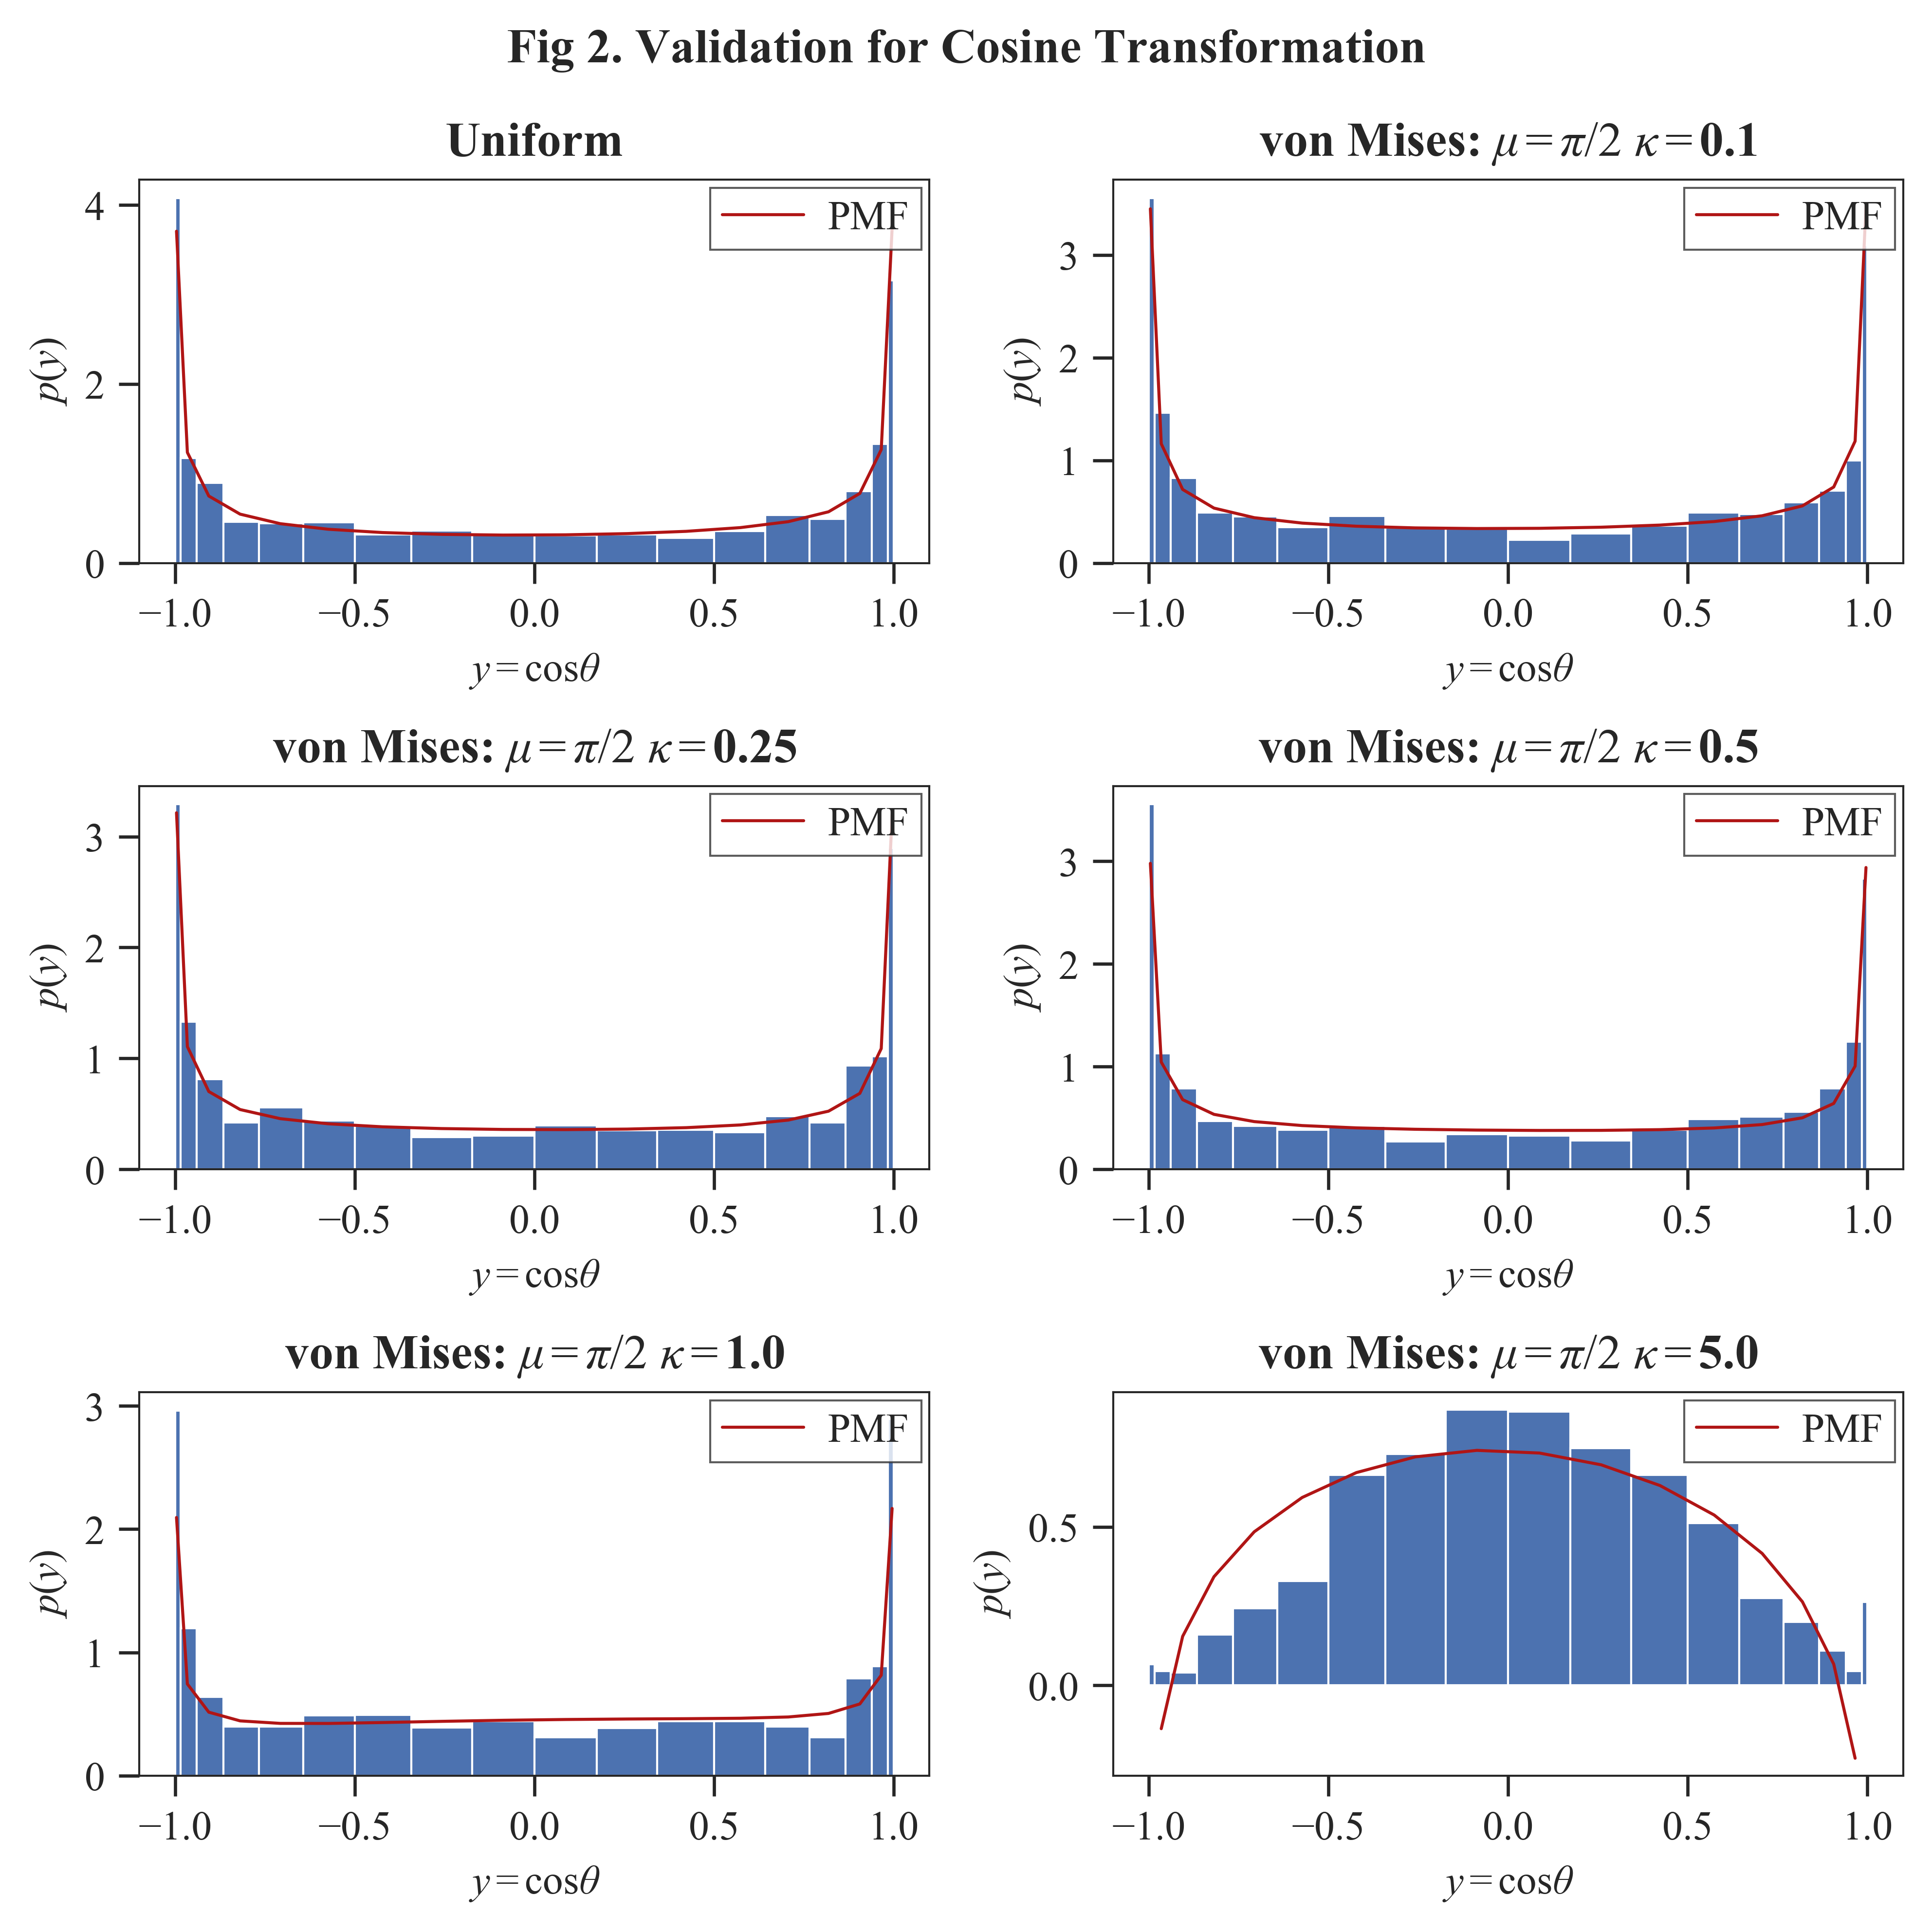

In [9]:
# VALIDATION
# Validation is performed by checking whether the PMFs obtained through functions map_rv2cos and map_rv2tan based on Eq.s (1)-(5)
# follow the same trend as the transformed raw data (distributions).

fig, axes = plt.subplots(3, 2, figsize=(6.5, 6.5))
axs = axes.ravel()

for n, (distr, pmf) in enumerate(zip(cosDistrs, cosPMFs)):
    ax = axs[n]
    h, b, _ = ax.hist(distr, bins=np.cos(thetaBins)[::-1], density=True)
    # In the last distribution vonMises(0, 5), the PMF estimates at domain edges overshoot.
    # Therefore the extrema are trimmed in the plot.
    if n == len(cosDistrs)-1:
        ax.plot(cosBinc[1:-1], pmf[1:-1], lw=0.75, color=np.asarray([176, 21, 21]) / 255, label='PMF')
    else:
        ax.plot(cosBinc, pmf, lw=0.75, color=np.asarray([176, 21, 21]) / 255, label='PMF')
    
    if n == 0:
        ax.set_title("Uniform")
    else:
        ax.set_title("von Mises: $\mu=\pi/2$ $\kappa=${0}".format(kappa[n-1]))
    ax.set_xlabel("$y = \cos{\\theta}$")
    ax.set_ylabel("$p(y)$")
    ax.legend(loc='upper right')

fig.suptitle("Fig 2. Validation for Cosine Transformation")
plt.show()

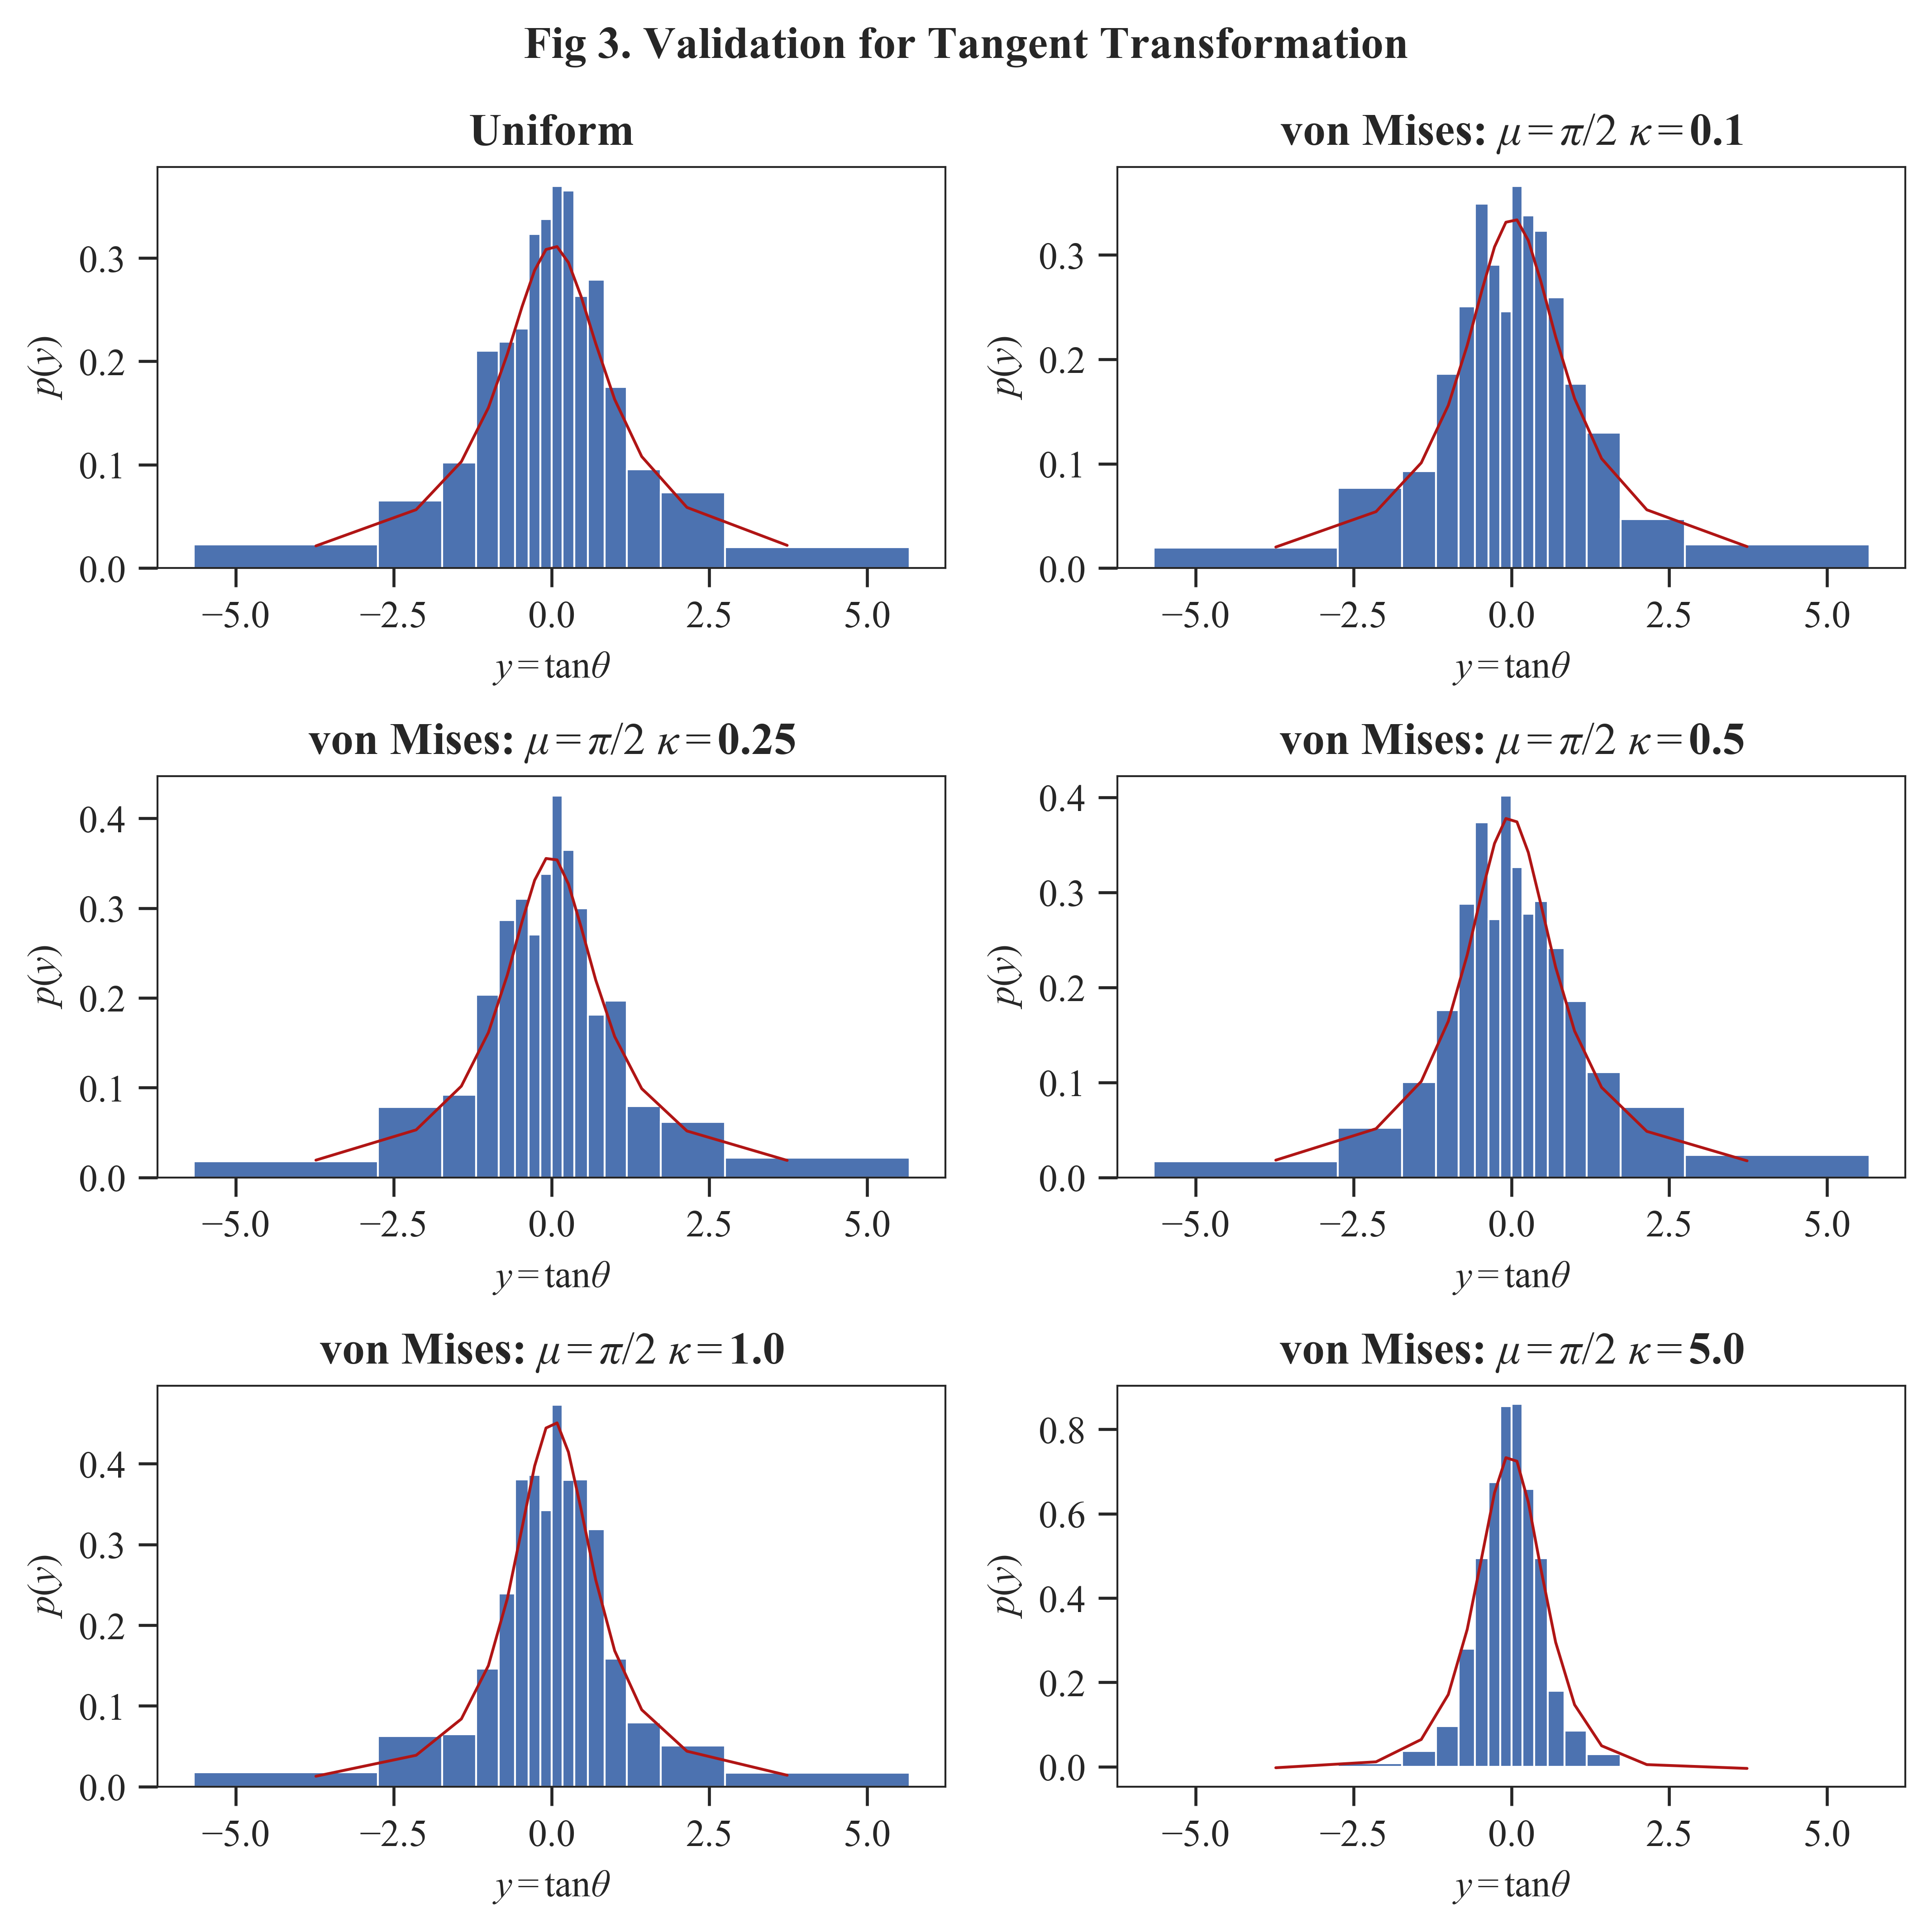

In [10]:
# VALIDATION
# Validation is performed by checking whether the PMFs obtained through functions map_rv2cos and map_rv2tan based on Eq.s (1)-(5)
# follow the same trend as the transformed raw data (distributions).

fig, axes = plt.subplots(3, 2, figsize=(7, 7))
axs = axes.ravel()

for n, (distr, pmf) in enumerate(zip(tanDistrs, tanPMFs)):
    ax = axs[n]
    h, b, _ = ax.hist(distr, bins=np.tan(thetaBins - np.pi/2)[1:-1], density=True)
    ax.plot((tanBinc)[1:-1], pmf[1:-1], lw=0.75, color=np.asarray([176, 21, 21]) / 255, label='PMF')
    if n == 0:
        ax.set_title("Uniform")
    else:
        ax.set_title("von Mises: $\mu=\pi/2$ $\kappa=${0}".format(kappa[n-1]))
    ax.set_xlabel("$y = \\tan{\\theta}$")
    ax.set_ylabel("$p(y)$")

fig.suptitle("Fig 3. Validation for Tangent Transformation")
plt.show()

Total probability of cosine transformation:  [1.1076619093833258, 1.0996953174510355, 1.0919416859713114, 1.0844828955944485, 1.0594442420603178, 0.9609840165434806]
Total probability of tangent transformation:  [1.0160153333159725, 1.017697386619409, 1.0193344757981881, 1.0209093127045685, 1.0261959334137303, 1.0469846657845243]


Text(0.5, 0.98, 'Fig 4. Total Probability of PMFs')

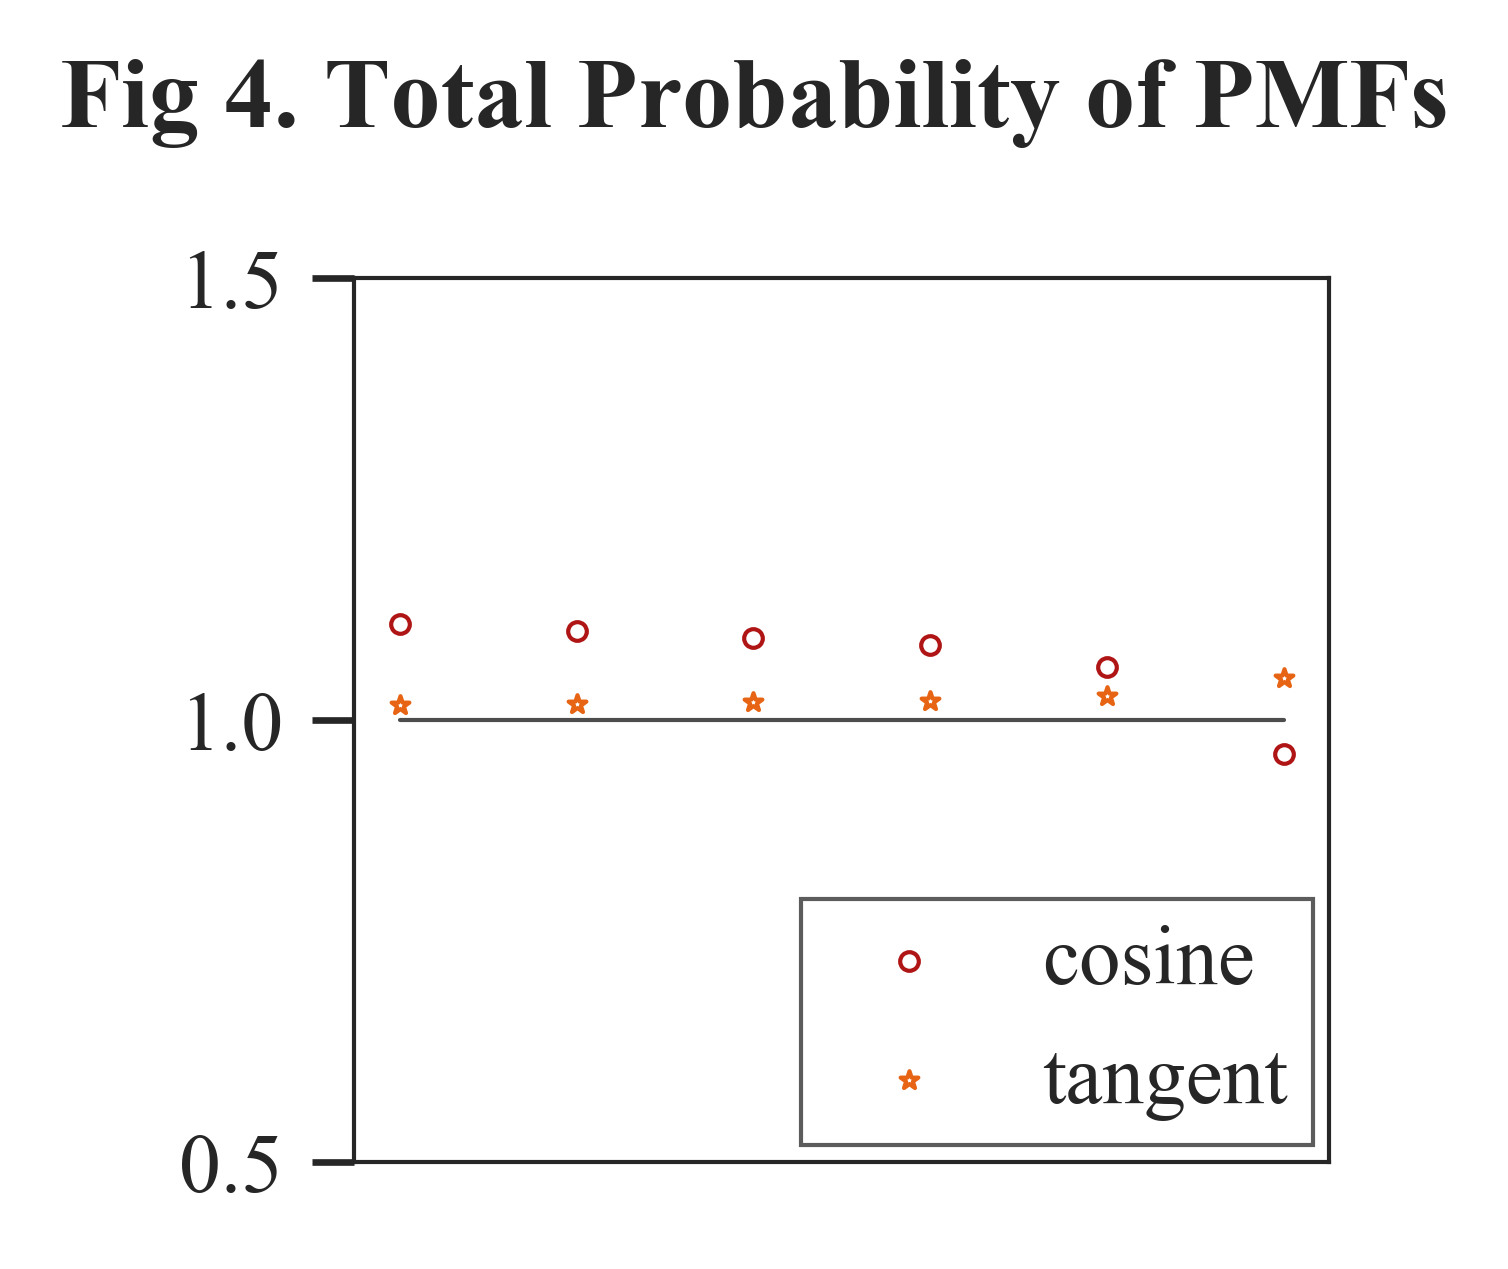

In [11]:
# VALIDATION: Total Probability must be equal to 1.
dy = np.mean(cosBinc[1:] - cosBinc[:-1])
cosTP = [np.sum(np.gradient(cosBinc)*pmf) for pmf in cosPMFs]
print("Total probability of cosine transformation: ", cosTP)

dy = np.mean(tanBinc[1:] - tanBinc[:-1])
tanTP = [np.sum(np.gradient(tanBinc)[1:-1]*pmf[1:-1]) for pmf in tanPMFs]
print("Total probability of tangent transformation: ", tanTP)

fig = plt.figure(figsize=(2, 2))
ax = fig.gca()
x = range(len(cosTP))
ax.scatter(x, cosTP, edgecolor=np.asarray([176, 21, 21]) / 255, s=5, facecolor='w', label="cosine")
ax.scatter(x, tanTP, edgecolor=np.asarray([230, 100, 20]) / 255, s=5, marker='*', 
           facecolor='w', label="tangent")
ax.plot(x, [1] * len(tanTP), lw=0.5, color='0.3')
ax.set_ylim([0.5, 1.5])
ax.set_yticks([0.5, 1.0, 1.5])
ax.set_yticklabels([0.5, 1.0, 1.5])
ax.set_xticks([])
ax.legend(loc='lower right')
fig.suptitle("Fig 4. Total Probability of PMFs")

## Distributions of Inverse Trigonometric Functions of RVs
Consider a random variable (RV) $X$ following a known probability density distribution (PDF) $ f_{X} $ and cumulative distribution function (CDF) $F_{X}$. We are interested in estimating the probability distribution followed by an inverse trigonometric function of $X$. The probability distribution for cosine and tangent transformations are derived below.

### Case 1: Arctangent Transformation
Let $ \Theta = \tan^{-1}{x} $,
then the task is to estimate probability distribution of $ Y $. The CDF of $ Y $ can be written as:

$$
\begin{align}
    F_{\Theta}(\theta)  &= P\{\Theta \leq \theta\}\\
            &= P\{tan^{-1}(X) \leq \theta\}\\
            &= P\{X \leq \tan{\theta} \}\\
            &= F_{X}\left(\tan{\theta} \right) \tag{9} \\[1em] 
            &= \int_{-\infty}^{\tan{\theta}} f_{X}(x)\ dx \tag{10}
\end{align}
$$

The PDF of $X$ can then be estimated from its definition as:
$$
\begin{align}
f_{\Theta}(\theta)  &= \frac{d}{d\theta} F_X(x)\\
        &= f_{X}(x=\tan{\theta}) . \sec^2{\theta} \tag{3}
\end{align}
$$

In [12]:
def map_rv2arctan(x, pmf_x, y):
    """
    Estimates PMF p(y) for the tranformation y=arctan(x) when the PMF p(x) is given.
    """
    assert len(x) == len(pmf_x), print("check input: len(x) not equal to len(pmf_x).")
    F = interp1d(x, pmf_x, kind='quadratic', fill_value='extrapolate')
    pmf_y = F(np.tan(y)) * (1 / np.cos(y))**2
    assert len(pmf_y) == len(y)
    return pmf_y

In [13]:
theta2PMFs = [map_rv2arctan(tanBinc, pmf, thetaBinc-np.pi/2) for pmf in tanPMFs]

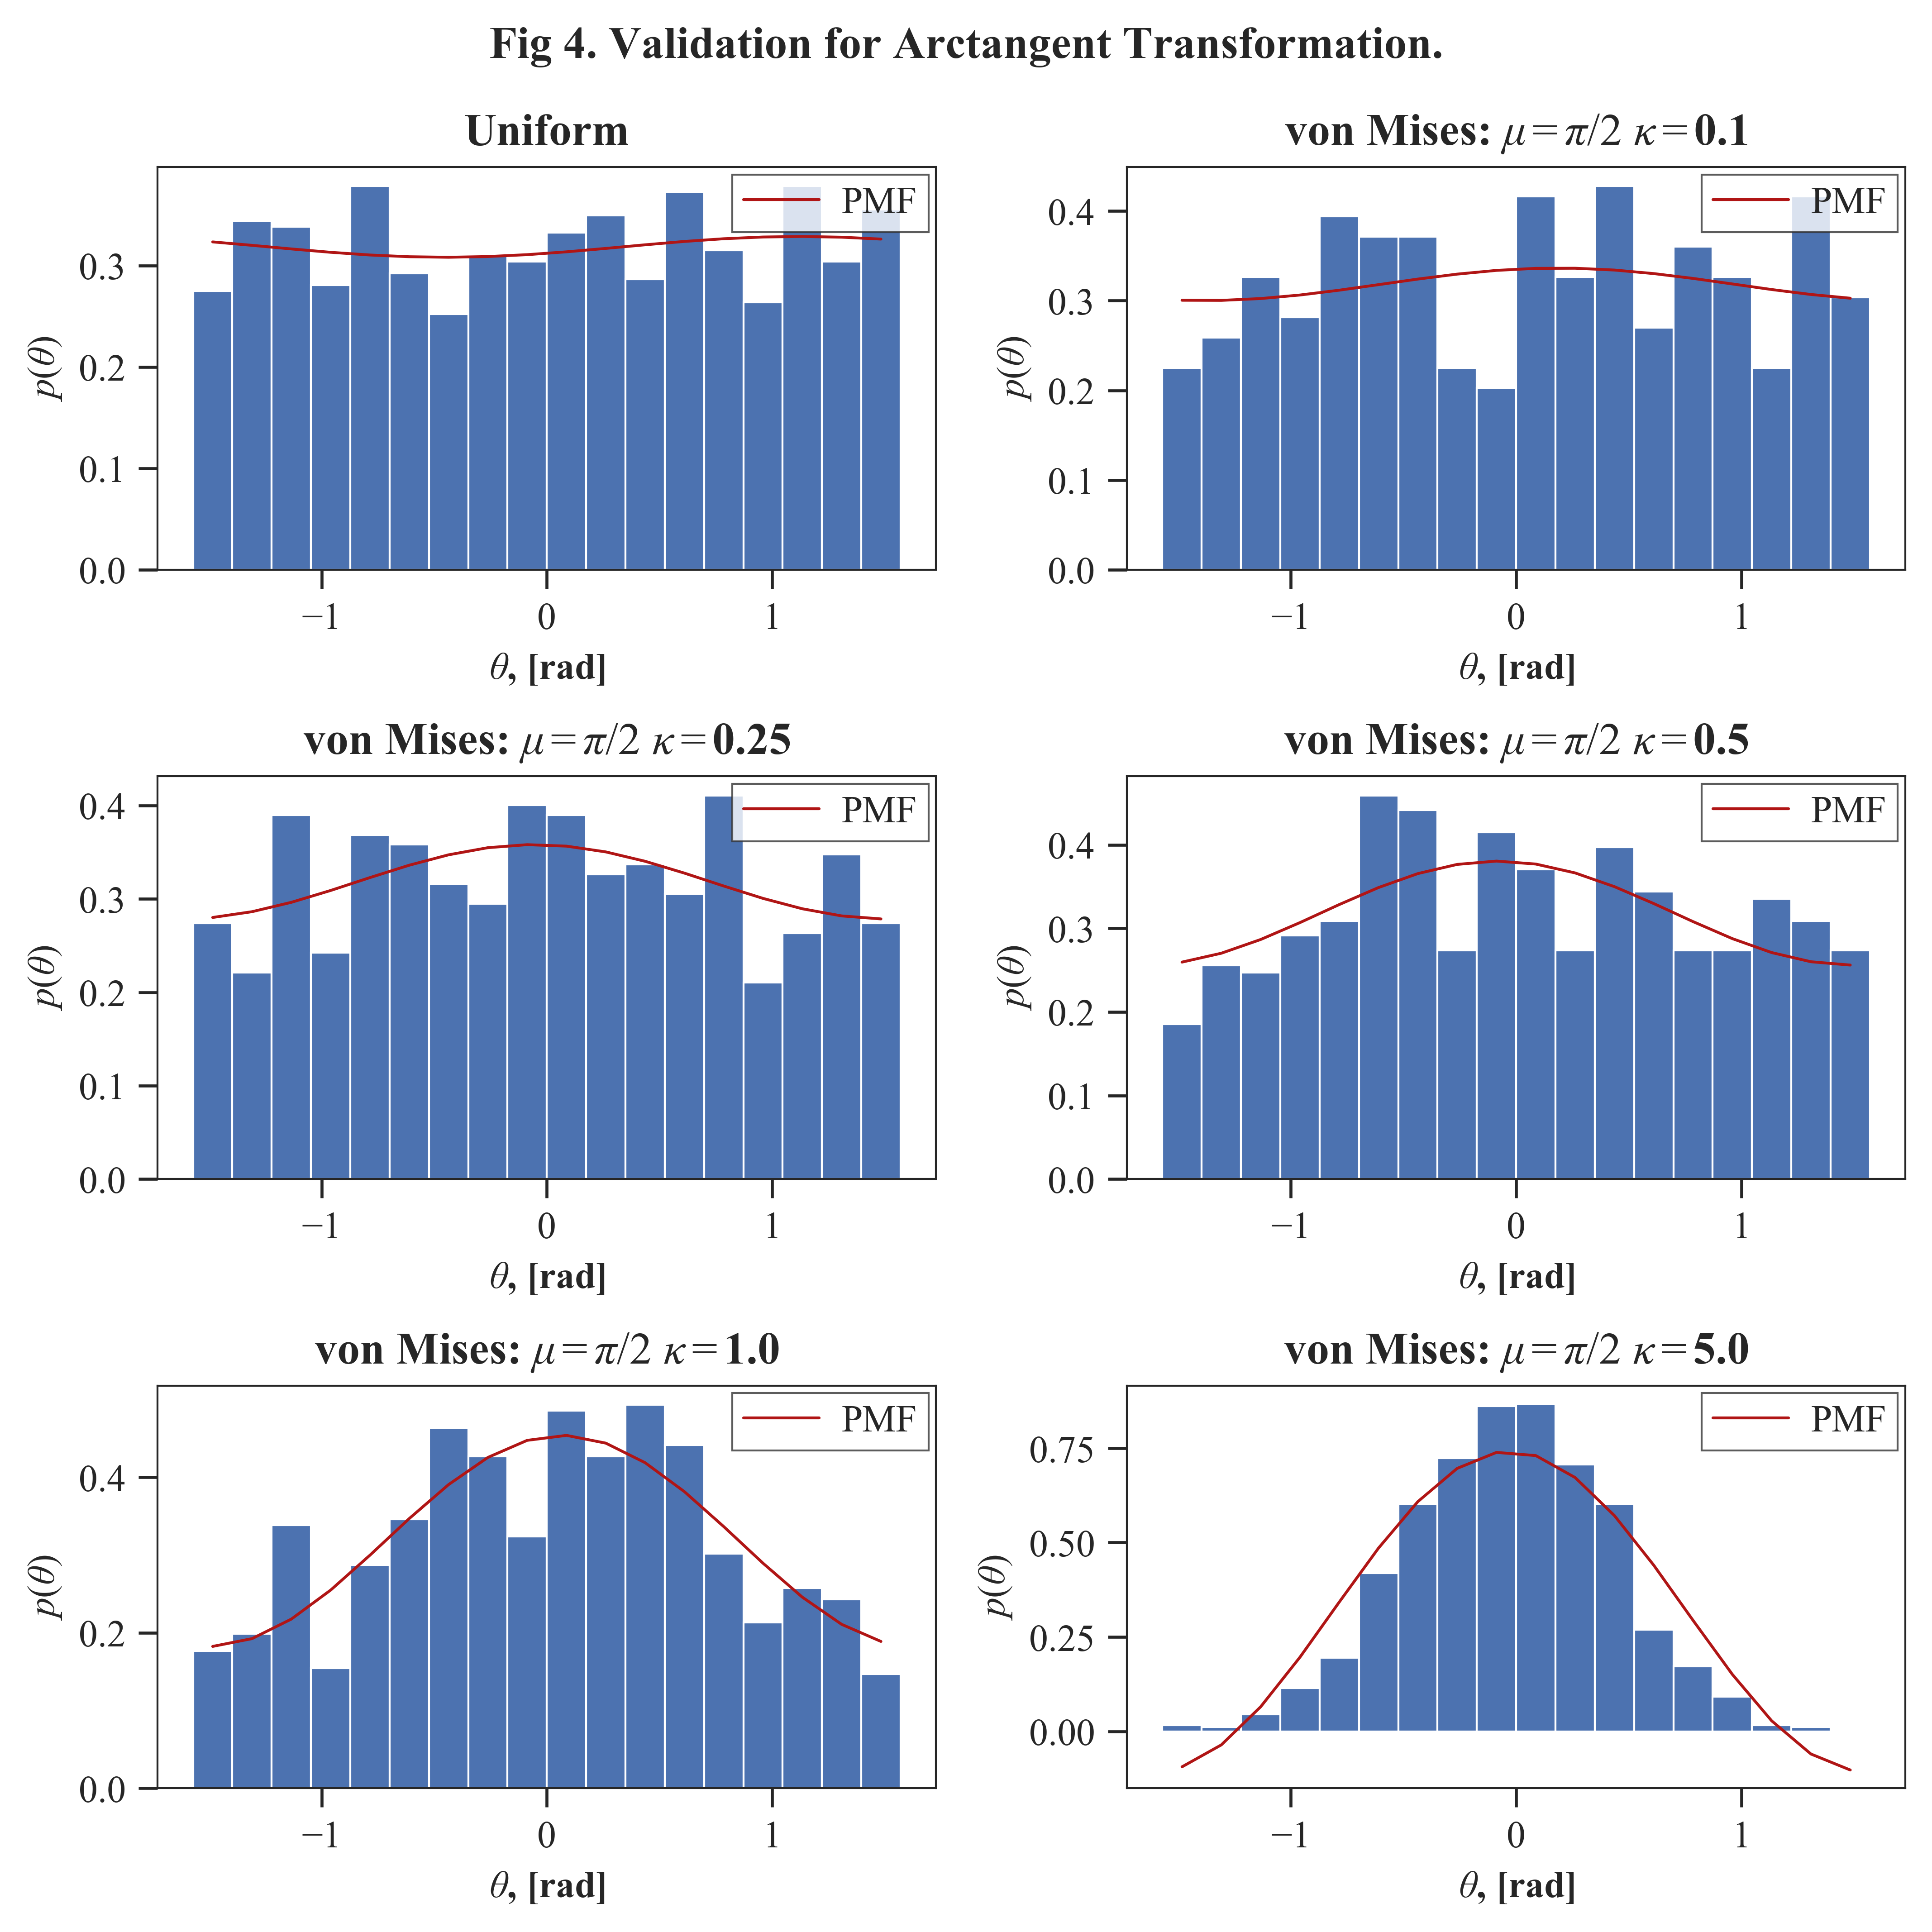

In [14]:
# VALIDATION
# Validation is performed by checking whether the PMFs obtained through functions map_rv2arctan
# follow the same trend as the transformed raw data (distributions).

fig, axes = plt.subplots(3, 2, figsize=(7, 7))
axs = axes.ravel()

for n, (distr, pmf) in enumerate(zip(thetaDistrs, theta2PMFs)):
    ax = axs[n]
    h, b, _ = ax.hist(distr-np.pi/2, bins=thetaBins-np.pi/2, density=True)
    ax.plot(thetaBinc-np.pi/2, pmf, lw=0.75, color=np.asarray([176, 21, 21]) / 255, label='PMF')
    if n == 0:
        ax.set_title("Uniform")
    else:
        ax.set_title("von Mises: $\mu=\pi/2$ $\kappa=${0}".format(kappa[n-1]))
    ax.set_xlabel("$\\theta$, [rad]")
    ax.set_ylabel("$p(\\theta)$")
    ax.legend(loc='upper right')

fig.suptitle("Fig 4. Validation for Arctangent Transformation.")
plt.show()